In [13]:
from time import sleep
import numpy as np
import urllib3
import matplotlib
from numpy import append
import config
import vectorbt as vbt
import pandas as pd
import pandas_ta as ta
from datetime import datetime
from alpaca_trade_api.rest import REST
import gym
import gym_anytrading
from tensorflow.keras.models import load_model

from stable_baselines import ACKTR
from stable_baselines.common.evaluation import evaluate_policy

60

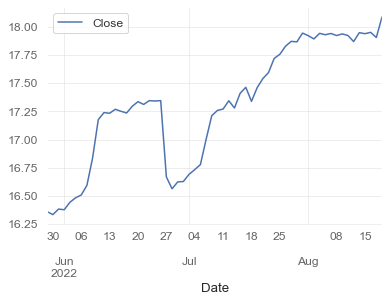

In [14]:
data = vbt.YFData.download(symbols= 'TRY=X', period="60d")
X=data.data['TRY=X'].index
Y=data.data['TRY=X'].Close
data.data['TRY=X'].reset_index().plot(x='Date', y='Close')
X=data.data['TRY=X']
tryDF = pd.DataFrame(X['Close'])
tryDF.size

In [15]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
testingSet = pd.DataFrame(tryDF)
testing_set_scaled = sc.fit_transform(testingSet)
testing_set_scaled

array([[0.01504925],
       [0.        ],
       [0.02804475],
       [0.02475592],
       [0.06236056],
       [0.08504642],
       [0.09941073],
       [0.14822131],
       [0.28660332],
       [0.48034639],
       [0.51603427],
       [0.51278567],
       [0.53285025],
       [0.52269238],
       [0.51421101],
       [0.54852573],
       [0.57126922],
       [0.55741808],
       [0.57668464],
       [0.57474613],
       [0.57662702],
       [0.19072713],
       [0.13081933],
       [0.1654189 ],
       [0.1675281 ],
       [0.20383787],
       [0.2275729 ],
       [0.25316163],
       [0.38025724],
       [0.5005871 ],
       [0.52703581],
       [0.53427559],
       [0.57594316],
       [0.53934854],
       [0.61384896],
       [0.64400291],
       [0.57303594],
       [0.64223619],
       [0.68795147],
       [0.7186175 ],
       [0.7901433 ],
       [0.81113092],
       [0.85211572],
       [0.87651177],
       [0.87388941],
       [0.91823697],
       [0.90529801],
       [0.888

In [16]:
inputs = tryDF[0:].values     #lstm input shape edit
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = np.array(inputs)
X_test = np.reshape(X_test, (int(X_test.size/60), 60,1))

C:\Users\90507\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [17]:
try_model = load_model('Lira_BOT.bot')

In [18]:
predicted_close_value = np.array([])
#predicted_close_value = sol_model.predict(X_test)
for i in range(0,7):
    predicted_close_value = try_model.predict(X_test)
    X_test = np.append(X_test,predicted_close_value)
    X_test = X_test[1:]
    X_test = np.reshape(X_test, (1,60,1))

In [19]:
predicted_close_value = sc.inverse_transform(X_test[0][-7:])

In [20]:
predicted_close_value = pd.DataFrame(predicted_close_value)
predicted_close_value.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       7 non-null      float64
dtypes: float64(1)
memory usage: 184.0 bytes


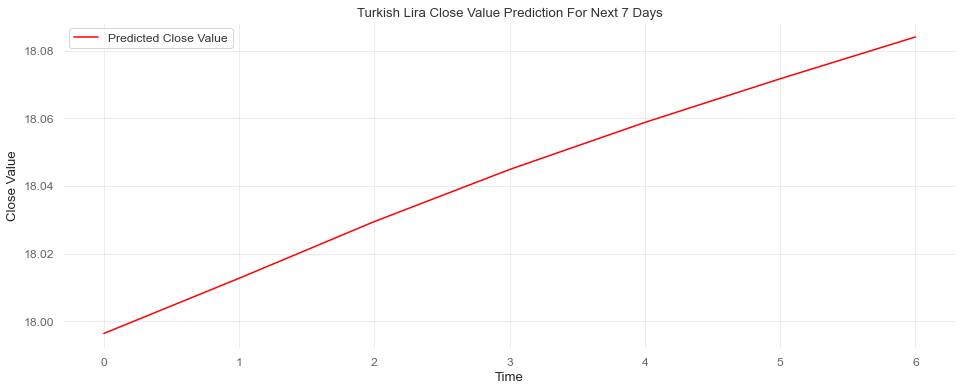

In [21]:
import matplotlib.pyplot as plt
figure = plt.figure()
figure.set_figwidth(16)
figure.set_figheight(6)
plt.plot(predicted_close_value, color='red', label='Predicted Close Value')
plt.title('Turkish Lira Close Value Prediction For Next 7 Days')
plt.xlabel('Time')
plt.ylabel('Close Value')
plt.legend()
plt.show()

In [22]:
current_value_TRY = tryDF["Close"][-1]
next_week_TRY = np.array([])
for i in range(predicted_close_value.size):
    next_week_TRY = np.append(next_week_TRY, 100 * (predicted_close_value[0][i]-current_value_TRY) / current_value_TRY)
    current_value_TRY = predicted_close_value[0][i]
print(next_week_TRY)

[-0.51033283  0.09077792  0.09321272  0.08552472  0.07720792  0.07154561
  0.06849489]


In [23]:
import pickle

%store -r next_week_SOL
all_next_week = np.append(next_week_TRY,next_week_SOL)
all_next_week = np.reshape(all_next_week,(2,7))

with open('Next_Week_Predictions.pickle', 'wb') as f:
    pickle.dump(all_next_week, f)

In [24]:
file = open('Next_Week_Predictions.pickle', 'rb')
temp = pickle.load(file)
print(temp)

[[-0.51033283  0.09077792  0.09321272  0.08552472  0.07720792  0.07154561
   0.06849489]
 [-0.02719107 -0.16640095 -0.13940814 -0.13251362 -0.13165018 -0.13159909
  -0.13011638]]
